# Sales Forecast

## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import signal
from scipy.stats import hmean
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pingouin as pg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error
import warnings




In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 2000)

## 2. Data Import and Exploartion

In [3]:
sales_train_validation = pd.read_csv('datasets/sales_train_validation.csv')

In [4]:
sales = sales_train_validation.copy()

In [5]:
print("Basic information about the data:")
print(sales.info())

print('\n Dimension of the data (rows,columns):')
print(sales.shape)

Basic information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1919 entries, id to d_1913
dtypes: int64(1913), object(6)
memory usage: 446.4+ MB
None

 Dimension of the data (rows,columns):
(30490, 1919)


In [6]:
#View of first 5 rows in the data
sales.head()

id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  \
0       CA    0    0    0    0    0    0    0    0    0     0     0     0   
1       CA    0    0    0    0    0    0    0    0    0     0     0     0   
2       CA    0    0    0    0    0    0    0    0    0     0     0     0   
3       CA    0    0    0    0    0    0    0    0    0     0     0     0   
4       CA    0    0    0    0    0    0    0    0    0     0     0     0   

   d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  d_23  d_24  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  d_35  d_36  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  d_47  d_48  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     2     0     0     0     2     0     1     0     0     0     0     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_49  d_50  d_51  d_52  d_53  d_54  d_55  d_56  d_57  d_58  d_59  d_60  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     2     0     1     0     0     1     1     1     0     2     3   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_61  d_62  d_63  d_64  d_65  d_66  d_67  d_68  d_69  d_70  d_71  d_72  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     1     0     0     0     0     0     1     0     0     1     1     0   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_73  d_74  d_75  d_76  d_77  d_78  d_79  d_80  d_81  d_82  d_83  d_84  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3     0     1     0     0     1     2     3     0     2     0     0     2   
4     0     0     0     0     0     0     0     0     0     0     0     0   

   d_85  d_86  d_87  d_88  d_89  d_90  d_91  d_92  d_93  d_94  d_95  d_96  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   


In [7]:
#View of last 5 rows in the data
sales.tail()

id      item_id  dept_id cat_id store_id  \
30485  FOODS_3_823_WI_3_validation  FOODS_3_823  FOODS_3  FOODS     WI_3   
30486  FOODS_3_824_WI_3_validation  FOODS_3_824  FOODS_3  FOODS     WI_3   
30487  FOODS_3_825_WI_3_validation  FOODS_3_825  FOODS_3  FOODS     WI_3   
30488  FOODS_3_826_WI_3_validation  FOODS_3_826  FOODS_3  FOODS     WI_3   
30489  FOODS_3_827_WI_3_validation  FOODS_3_827  FOODS_3  FOODS     WI_3   

      state_id  d_1  d_2  d_3  d_4  d_5  d_6  d_7  d_8  d_9  d_10  d_11  d_12  \
30485       WI    0    0    2    2    0    3    1    4    1     0     0     3   
30486       WI    0    0    0    0    0    5    0    1    1     3     1     1   
30487       WI    0    6    0    2    2    4    1    8    5     2     7     5   
30488       WI    0    0    0    0    0    0    0    0    0     0     0     0   
30489       WI    0    0    0    0    0    0    0    0    0     0     0     0   

       d_13  d_14  d_15  d_16  d_17  d_18  d_19  d_20  d_21  d_22  d_23  d_24  \
30485     4     4     0     0     1     0     1     1     7     7     3     6   
30486     0     4     2     0     1     2     1     1     0     0     0     0   
30487     3     5    20     8    10     3     3     4     7     2     3     5   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_25  d_26  d_27  d_28  d_29  d_30  d_31  d_32  d_33  d_34  d_35  d_36  \
30485     3     3     7    12     4     2     7     5    12     5     3     3   
30486     3     1     1     1     2     0     1     0     1     1     1     3   
30487     6     3     4     1     2     5     1     2     2     2     1     9   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_37  d_38  d_39  d_40  d_41  d_42  d_43  d_44  d_45  d_46  d_47  d_48  \
30485     7     6     4     6     3     6     2     3     4     1     1     3   
30486     3     4     4     3     6     1     0     1     2     3     0     1   
30487     8     1     6     3     3     4    10     4     6     3     2     1   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_49  d_50  d_51  d_52  d_53  d_54  d_55  d_56  d_57  d_58  d_59  d_60  \
30485     2     1     2     3     4     7     2     4     4     4     7     7   
30486     1     1     0     0     0     1     0     0     1     0     0     0   
30487     1     3     2     2     1     1     1     1     1     0     1     4   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_61  d_62  d_63  d_64  d_65  d_66  d_67  d_68  d_69  d_70  d_71  d_72  \
30485     2     4     7     4     4     7     3     4     2     3    10     6   
30486     1     2     0     1     2     1     2     0     1     1     0     1   
30487     0     0     1     3     1     1     1     3     0     1     1     1   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_73  d_74  d_75  d_76  d_77  d_78  d_79  d_80  d_81  d_82  d_83  d_84  \
30485     8     5     1     0     2     1     0     3     0     2     3     1   
30486     1     2     0     3     2     1     0     0     0     0     1     1   
30487     2     3     1     1     1     2     1     3     1     0     0     3   
30488     0     0     0     0     0     0     0     0     0     0     0     0   
30489     0     0     0     0     0     0     0     0     0     0     0     0   

       d_85  d_86  d_87  d_88  d_89  d_90  d_91  d_92  d_93  d_94  d_95  d_96  \
30485     1     1     7     1     4     2     2     0     0     0     5     1   
3048

In [8]:
#Data has no missing values
sales.isna().sum().nlargest(10)

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
d_1         0
d_2         0
d_3         0
d_4         0
dtype: int64

In [9]:
print('Categories in data:')
print(sales.cat_id.unique())

print('\n Departments in data:')
print(sales.dept_id.unique())

print('\n Stores in data:')
print(sales.store_id.unique())

print('\n States in data:')
print(sales.state_id.unique())

Categories in data:
['HOBBIES' 'HOUSEHOLD' 'FOODS']

 Departments in data:
['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']

 Stores in data:
['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']

 States in data:
['CA' 'TX' 'WI']


In [10]:
def state_value_counts(state, state_full):
    """function takes two positional arguments; state abbreviation, and state name in full, and 
    prints counts for items, departments, product categories, and stores."""
    
    print("Top 10 Item ID Counts in %s stores:"%state_full)
    print(sales[sales.state_id==state].item_id.value_counts().nlargest(10))
    
    print("\n Department ID Counts in %s stores:"%state_full)
    print(sales[sales.state_id==state].dept_id.value_counts())
    
    print("\n Product Category Counts in %s stores:"%state_full)
    print(sales[sales.state_id==state].cat_id.value_counts())
    
    print("\n Store Counts in %s:"%state_full)
    print(sales[sales.state_id==state].store_id.value_counts())

In [11]:
state_value_counts("CA", "California")

Top 10 Item ID Counts in California stores:
HOUSEHOLD_2_026    4
FOODS_1_144        4
HOUSEHOLD_2_301    4
HOUSEHOLD_1_475    4
HOBBIES_2_074      4
HOBBIES_2_086      4
HOUSEHOLD_1_276    4
FOODS_3_048        4
HOUSEHOLD_2_319    4
FOODS_1_105        4
Name: item_id, dtype: int64

 Department ID Counts in California stores:
FOODS_3        3292
HOUSEHOLD_1    2128
HOUSEHOLD_2    2060
HOBBIES_1      1664
FOODS_2        1592
FOODS_1         864
HOBBIES_2       596
Name: dept_id, dtype: int64

 Product Category Counts in California stores:
FOODS        5748
HOUSEHOLD    4188
HOBBIES      2260
Name: cat_id, dtype: int64

 Store Counts in California:
CA_3    3049
CA_1    3049
CA_2    3049
CA_4    3049
Name: store_id, dtype: int64


In [12]:
state_value_counts("TX", "Texas")

Top 10 Item ID Counts in Texas stores:
HOUSEHOLD_2_026    3
FOODS_2_173        3
HOBBIES_2_086      3
HOUSEHOLD_1_276    3
FOODS_3_048        3
HOUSEHOLD_2_319    3
FOODS_1_105        3
HOUSEHOLD_1_255    3
FOODS_1_144        3
HOUSEHOLD_1_474    3
Name: item_id, dtype: int64

 Department ID Counts in Texas stores:
FOODS_3        2469
HOUSEHOLD_1    1596
HOUSEHOLD_2    1545
HOBBIES_1      1248
FOODS_2        1194
FOODS_1         648
HOBBIES_2       447
Name: dept_id, dtype: int64

 Product Category Counts in Texas stores:
FOODS        4311
HOUSEHOLD    3141
HOBBIES      1695
Name: cat_id, dtype: int64

 Store Counts in Texas:
TX_3    3049
TX_2    3049
TX_1    3049
Name: store_id, dtype: int64


In [13]:
state_value_counts("WI", "Wisconsin")

Top 10 Item ID Counts in Wisconsin stores:
HOUSEHOLD_2_026    3
FOODS_2_173        3
HOBBIES_2_086      3
HOUSEHOLD_1_276    3
FOODS_3_048        3
HOUSEHOLD_2_319    3
FOODS_1_105        3
HOUSEHOLD_1_255    3
FOODS_1_144        3
HOUSEHOLD_1_474    3
Name: item_id, dtype: int64

 Department ID Counts in Wisconsin stores:
FOODS_3        2469
HOUSEHOLD_1    1596
HOUSEHOLD_2    1545
HOBBIES_1      1248
FOODS_2        1194
FOODS_1         648
HOBBIES_2       447
Name: dept_id, dtype: int64

 Product Category Counts in Wisconsin stores:
FOODS        4311
HOUSEHOLD    3141
HOBBIES      1695
Name: cat_id, dtype: int64

 Store Counts in Wisconsin:
WI_3    3049
WI_2    3049
WI_1    3049
Name: store_id, dtype: int64


In [84]:
def make_countplot(x, hue, data, title, save="NewPlot"):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = sns.countplot(x=x, hue=hue, data=data)
    ax.set_title(title)
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = "center", va = "center", xytext= (0,9), textcoords ="offset points")

    plt.savefig(save)
    plt.show()

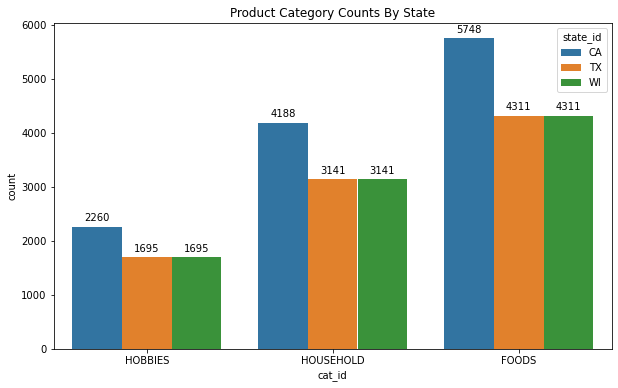

In [85]:
make_countplot("cat_id", "state_id", sales, "Product Category Counts By State", save="FinalFigures/CatByState_Bar")

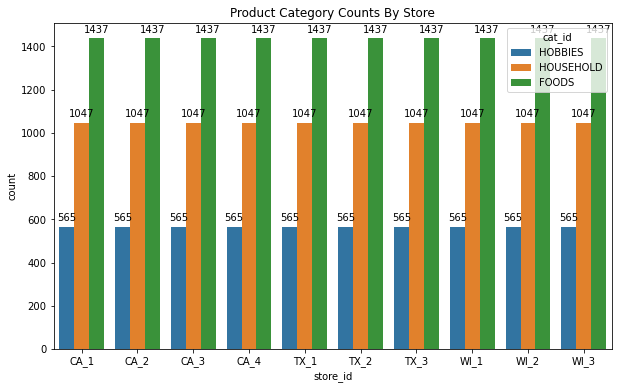

In [86]:
make_countplot("store_id", "cat_id", sales, "Product Category Counts By Store", save="FinalFigures/CatByStore_Bar")

In [17]:
#Create arbitrary date
date = pd.to_datetime("20110101",format="%Y%m%d")
date_series = date + pd.to_timedelta(np.arange(1913), 'D')

#days list
days = [i+1 for i in range(0,1913)]

In [18]:
#function to create dataframes at various levels
def make_dataframe(data=sales, level="state", date=date):
    """state, store, category, department, product"""
    if level=="state":
        level_data = data.groupby(by="state_id").sum()
    elif level=="store":
        level_data = data.groupby(by="store_id").sum()
    elif level=="category":
        level_data = data.groupby(by="cat_id").sum()
    elif level=="department":
        level_data = data.groupby(by="dept_id").sum()
    elif level=="product":
        level_data = data.groupby(by="item_id").sum()
        
    for_column = level_data.index.to_list()
    transposed_data = np.transpose(level_data.values)
    
    df = pd.DataFrame(transposed_data, index=date, columns=for_column)
    df.index.set_names('day',inplace=True)
    return df
    
  

In [19]:
#state_sales = make_dataframe(data=sales, level="state", date=date_series)
state_sales = make_dataframe(data=sales, level="state", date=days)
store_sales = make_dataframe(data=sales, level="store", date=days)
category_sales = make_dataframe(data=sales, level="category", date=days)
department_sales = make_dataframe(data=sales, level="department", date=days)
unit_sales = make_dataframe(data=sales, level="product", date=days)

In [20]:
state_sales.head()

,CA,TX,WI
day,,,
1,14195,9438,8998
2,13805,9630,8314
3,10108,6778,6897
4,11047,7381,6984
5,9925,5912,3309


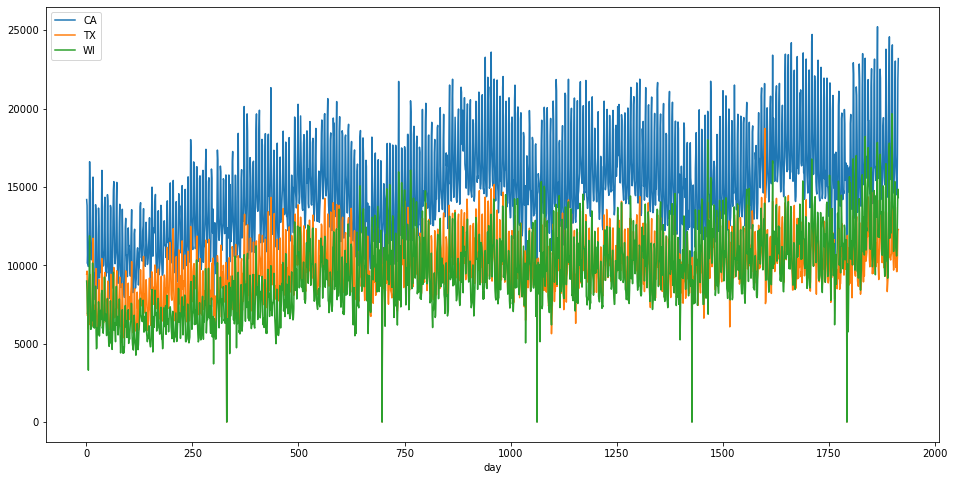

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))
state_sales.plot(ax=ax)
plt.savefig("FinalFigures/StatesJointLinePlot.png")
plt.show()

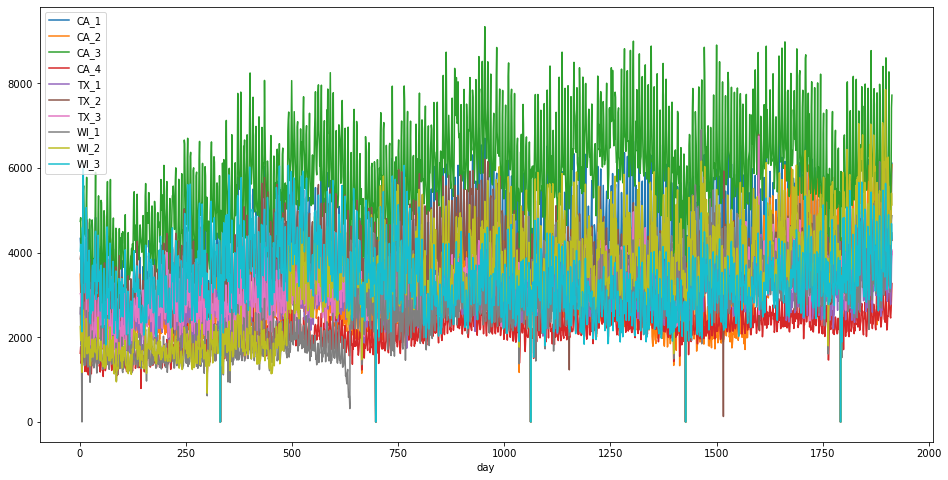

In [22]:
fig, ax = plt.subplots(figsize=(16, 8))
store_sales.plot(ax=ax)
plt.savefig("FinalFigures/StoresJointLinePlot.png")
plt.show()

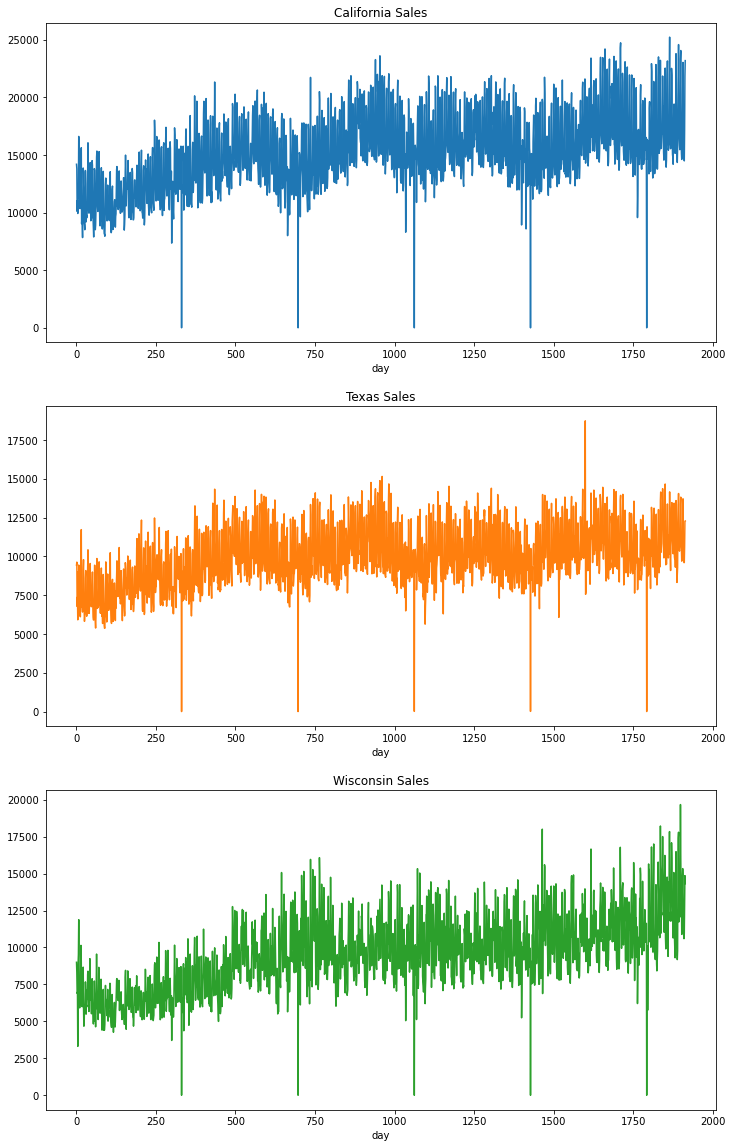

In [23]:
fig, ax = plt.subplots(3,1, figsize=(12, 20))
state_sales["CA"].plot(title="California Sales", ax=ax[0], color="tab:blue")
state_sales["TX"].plot(title="Texas Sales", ax=ax[1], color="tab:orange")
state_sales["WI"].plot(title="Wisconsin Sales",ax=ax[2], color="tab:green")
plt.savefig("FinalFigures/StatesSeparateLinePlot.png")
plt.show()

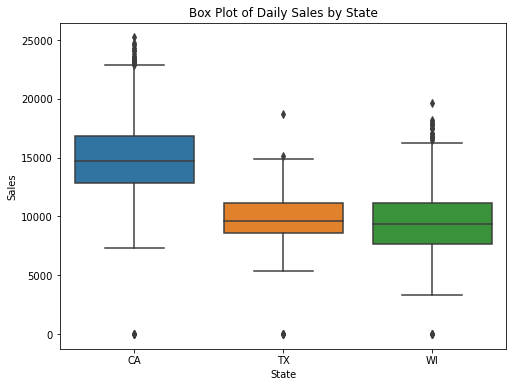

In [24]:
re_df = state_sales.reset_index()
df = pd.melt(re_df, id_vars=["day"], value_vars=state_sales.columns, var_name="State",value_name="Sales")
fig, ax0 = plt.subplots(figsize=(8, 6))
ax0 = sns.boxplot(x="State", y="Sales" ,data=df)
ax0.set_title("Box Plot of Daily Sales by State")
plt.savefig("FinalFigures/State_Boxplot.png")
plt.show()

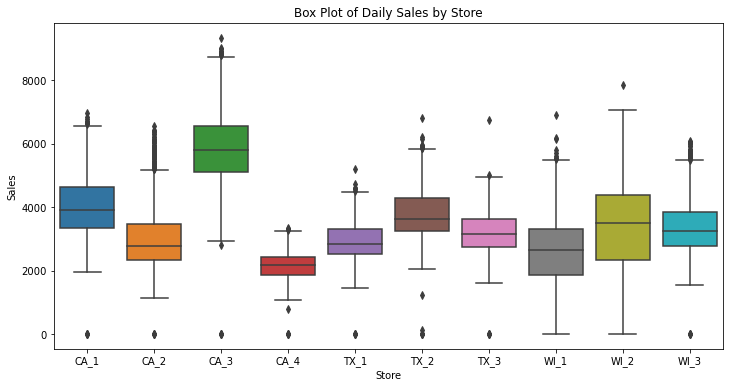

In [25]:
re_df = store_sales.reset_index()
df = pd.melt(re_df, id_vars=["day"], value_vars=store_sales.columns, var_name="Store",value_name="Sales")
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x="Store", y="Sales" ,data=df)
ax.set_title("Box Plot of Daily Sales by Store")
plt.savefig("FinalFigures/Store_Boxplot.png")
plt.show()

### Focus on CA_3 Sales

In [26]:
#California Store 3 - Store Level Sales
ca3_sales = store_sales[["CA_3"]]

#California Store 3 - Product Category Level Sales
ca3_category_sales = make_dataframe(data=sales[sales.store_id=="CA_3"], level="category", date=days)

#California Store 3 - DProduct Department Level Sales
ca3_department_sales = make_dataframe(data=sales[sales.store_id=="CA_3"], level="department", date=days)

#California Store 3 - Unit Product Level Sales
ca3_unit_sales = make_dataframe(data=sales[sales.store_id=="CA_3"], level="product", date=days)

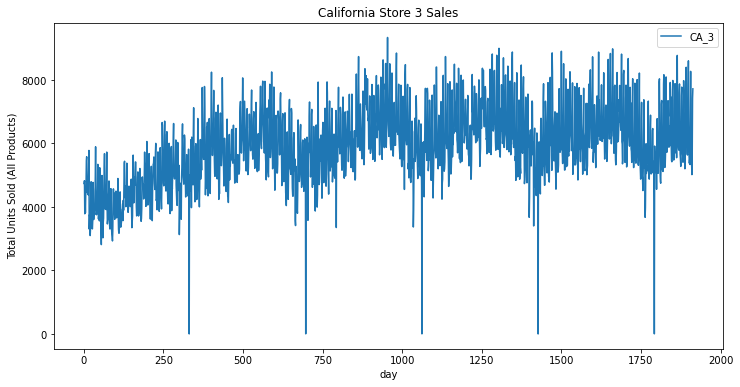

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
ca3_sales.plot(title="California Store 3 Sales", ax=ax, color="tab:blue")
plt.ylabel("Total Units Sold (All Products)")
plt.savefig("FinalFigures/CA3SalesLinePlot.png")
plt.show()

#### Decomposition

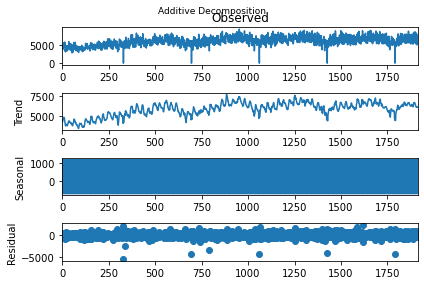

In [89]:
#Decomposition

ca3_values = ca3_sales.values
#Replace zeros with 1 for Multiplicative decompose to work
ca3_values[ca3_values == 0] = 1

add_decompose = seasonal_decompose(ca3_values, model="additive",period=7)

#fig, ax = plt.subplots(figsize=(12, 8))
add_decompose.plot().suptitle("Additive Decomposition", fontsize=9)
plt.savefig("FinalFigures/CA3SalesAddDecomposePlot1.png")
plt.show()

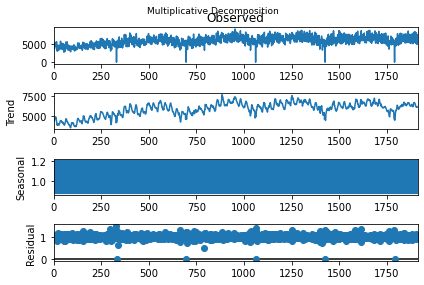

In [29]:
mul_decompose = seasonal_decompose(ca3_values, model="multiplicative",period=7)

#fig, ax = plt.subplots(figsize=(12, 8))
mul_decompose.plot().suptitle("Multiplicative Decomposition", fontsize=9)
plt.savefig("FinalFigures/CA3SalesMultDecomposePlot1.png")
plt.show()

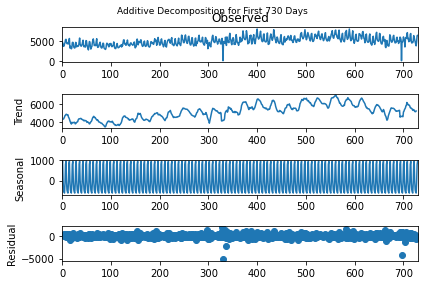

In [91]:
#First 730 Days Decomposition
ca3_values = ca3_sales.iloc[:730,].values
#Replace zeros with 1 for Multiplicative decompose to work
ca3_values[ca3_values == 0] = 1


add_decompose = seasonal_decompose(ca3_values, model="additive",period=7)

#fig, ax = plt.subplots(figsize=(12, 8))
add_decompose.plot().suptitle("Additive Decomposition for First 730 Days", fontsize=9)
plt.savefig("FinalFigures/CA3SalesAddDecomposePlot3.png")
plt.show()

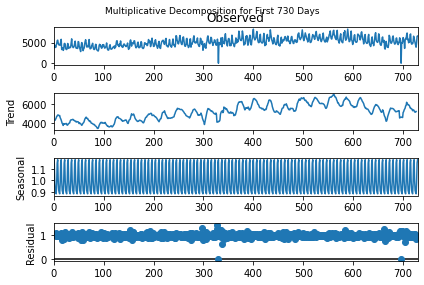

In [31]:
#First 730 Days
mul_decompose = seasonal_decompose(ca3_values, model="multiplicative",period=7)

#fig, ax = plt.subplots(figsize=(12, 8))
mul_decompose.plot().suptitle("Multiplicative Decomposition for First 730 Days", fontsize=9)
plt.savefig("FinalFigures/CA3SalesMultDecomposePlot3.png")
plt.show()

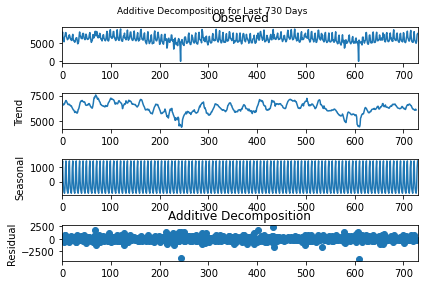

In [90]:
#Last 365 Days Decomposition
ca3_values = ca3_sales.iloc[-730:,].values
#Replace zeros with 1 for Multiplicative decompose to work
ca3_values[ca3_values == 0] = 1


add_decompose = seasonal_decompose(ca3_values, model="additive",period=7)

#fig, ax = plt.subplots(figsize=(12, 8))
add_decompose.plot().suptitle("Additive Decomposition for Last 730 Days", fontsize=9)
plt.title("Additive Decomposition")
plt.savefig("FinalFigures/CA3SalesAddDecomposePlot2.png")
plt.show()

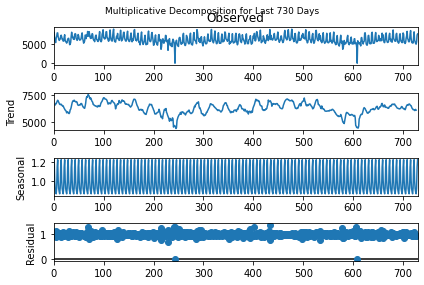

In [33]:
#Last 365 Days
mul_decompose = seasonal_decompose(ca3_values, model="multiplicative",period=7)

#fig, ax = plt.subplots(figsize=(12, 8))
mul_decompose.plot().suptitle("Multiplicative Decomposition for Last 730 Days", fontsize=9)
plt.savefig("FinalFigures/CA3SalesMultDecomposePlot2.png")
plt.show()

#### Is the series stationary?

In [34]:
#adf test - Null hypothesis is time series is non-stationary
#kpss test - Null hypothesis is time series is stationary

def stationarity_tester(df=state_sales):
    for column in df.columns:
        # ADF Test
        print("Is the %s sales Time Series Stationary?"%(column))
        result = adfuller(df[column].values, autolag='AIC')
        print(f'ADF Statistic: {result[0]}')
        print(f'p-value: {result[1]}')
        for key, value in result[4].items():
            print('Critial Values:')
            print(f'   {key}, {value}')


        # KPSS Test
        result = kpss(df[column].values, regression='c', nlags='legacy')
        print('\nKPSS Statistic: %f' % result[0])
        print('p-value: %f' % result[1])
        for key, value in result[3].items():
            print('Critial Values:')
            print(f'   {key}, {value}')    
        print("\n")

In [35]:
#Entire Series is not stationary
stationarity_tester(df=ca3_sales)

Is the CA_3 sales Time Series Stationary?
ADF Statistic: -2.3971528976615244
p-value: 0.14254159528904403
Critial Values:
   1%, -3.433822016251123
Critial Values:
   5%, -2.8630736989499335
Critial Values:
   10%, -2.567586484303047

KPSS Statistic: 3.804115
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739




In [36]:
#First 413 days are not stationary
stationarity_tester(df=ca3_sales.iloc[:413,])

Is the CA_3 sales Time Series Stationary?
ADF Statistic: -2.0147926327128434
p-value: 0.2801249466023923
Critial Values:
   1%, -3.446845912589748
Critial Values:
   5%, -2.8688110853002007
Critial Values:
   10%, -2.5706432834592747

KPSS Statistic: 1.742358
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739




In [37]:
#Last 1500 days are stationary: No need for differencing series
stationarity_tester(df=ca3_sales.iloc[-1500:,])

Is the CA_3 sales Time Series Stationary?
ADF Statistic: -3.404242363738043
p-value: 0.010815097094019182
Critial Values:
   1%, -3.434791163965702
Critial Values:
   5%, -2.8635014840083945
Critial Values:
   10%, -2.5678142741740877

KPSS Statistic: 0.822602
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739




In [38]:
def make_acf_pacf_plots(df):
    for column in df.columns:
        fig, axes = plt.subplots(1,2,figsize=(16,5))
        #print("%s sales Time Series"%(column))
        plot_acf(df[column].tolist(), lags=50, ax=axes[0])
        plot_pacf(df[column].tolist(), lags=50, ax=axes[1])
        fig.suptitle("%s Sales Time Series"%(column), fontsize=16)
        plt.savefig("FinalFigures/%sSalesACFPACFplots.png"%(column))

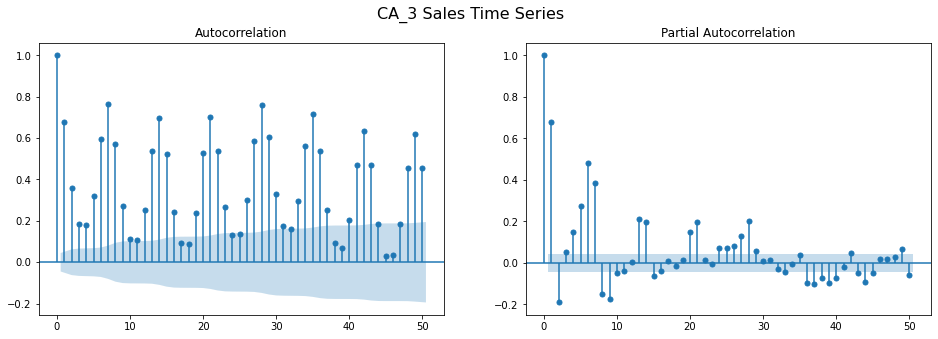

In [39]:
make_acf_pacf_plots(ca3_sales)

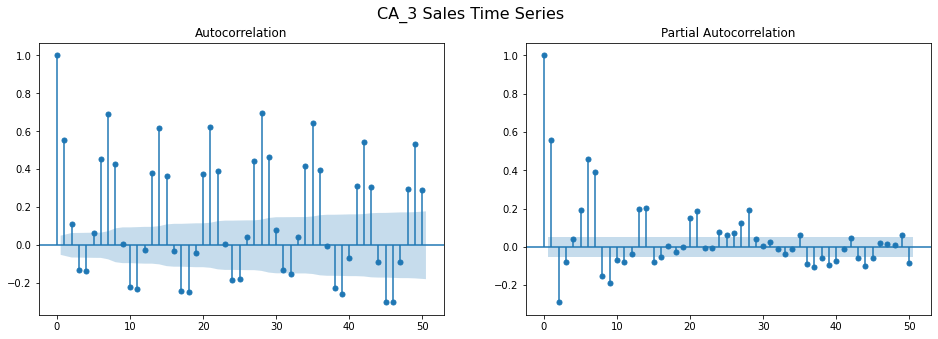

In [92]:
make_acf_pacf_plots(ca3_sales.iloc[-1500:,])

## Data Modeling

In [40]:
#Model with recent statinary data
ca3_sales_recent = ca3_sales.iloc[-1500:,]  

### ARIMA Model

In [41]:
def find_optimal_arima(ts, p, q):
    bicList = []
    pqtuple = []
    for pval in p:
        for qval in q:
            model = SARIMAX(ts, order=(pval,0,qval))
            result = model.fit()
            bicList.append(result.bic)
            pqtuple.append((pval,0,qval))
    minbic = min(bicList)
    index = bicList.index(minbic)
    print("Best Model --> ARIMA%s"%(pqtuple[index],))

In [42]:
find_optimal_arima(ca3_sales_recent.CA_3, [0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7])

Best Model --> ARIMA(6, 0, 7)


In [43]:
arima_mod = SARIMAX(ca3_sales_recent.CA_3, order=(6,0,7))
arima_result = arima_mod.fit()
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                   CA_3   No. Observations:                 1500
Model:               SARIMAX(6, 0, 7)   Log Likelihood              -11729.488
Date:                Tue, 16 Feb 2021   AIC                          23486.976
Time:                        09:23:52   BIC                          23561.361
Sample:                             0   HQIC                         23514.687
                               - 1500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8546      0.088      9.705      0.000       0.682       1.027
ar.L2         -0.5353      0.159     -3.367      0.001      -0.847      -0.224
ar.L3          0.1137      0.199      0.572      0.5

<Figure size 1152x576 with 0 Axes>

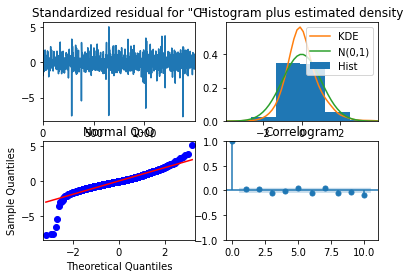

In [44]:
#Snip plots
plt.figure(figsize=(16,8))
arima_result.plot_diagnostics()
plt.show()

In [45]:
#save arima rmse (residuals)
arima_residuals = arima_result.resid
arima_residuals = arima_residuals.values
arima_rmse = np.sqrt(np.mean(np.square(arima_residuals)))
arima_rmse

624.0282374641181

In [46]:
arima_forecast = arima_result.get_forecast(steps=28).predicted_mean

In [47]:
forecast_days = [max(days)+i for i in range(1,29)]

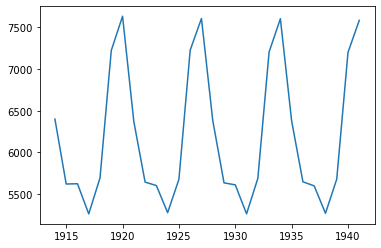

In [48]:
plt.plot(forecast_days, arima_forecast)
plt.show()

### SARIMA Model

In [49]:
def find_optimal_sarima(ts, p, q):
    bicList = []
    pqtuple = []
    for pval in p:
        for qval in q:
            model = SARIMAX(ts, order=(0,0,0),seasonal_order=(pval,1,qval,7))
            result = model.fit()
            bicList.append(result.bic)
            pqtuple.append((pval,1,qval,7))
    minbic = min(bicList)
    index = bicList.index(minbic)
    print("Best Model --> SARIMA(0,0,0)%s"%(pqtuple[index],))

In [50]:
find_optimal_sarima(ca3_sales_recent.CA_3, [0,1,2,3,4,5,6,7], [0,1,2,3,4,5,6,7])

Best Model --> SARIMA(0,0,0)(6, 1, 6, 7)


In [51]:
sarima_mod = SARIMAX(ca3_sales_recent.CA_3, order=(0,0,0), seasonal_order=(6,1,6,7))
sarima_result = sarima_mod.fit()
print(sarima_result.summary())

                                        SARIMAX Results                                         
Dep. Variable:                                     CA_3   No. Observations:                 1500
Model:             SARIMAX(6, 1, [1, 2, 3, 4, 5, 6], 7)   Log Likelihood              -11708.801
Date:                                  Tue, 16 Feb 2021   AIC                          23443.601
Time:                                          09:46:08   BIC                          23512.612
Sample:                                               0   HQIC                         23469.316
                                                 - 1500                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.6278      0.068     -9.213      0.000      -0.761

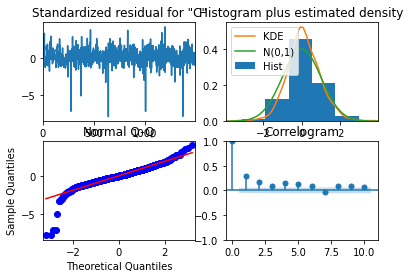

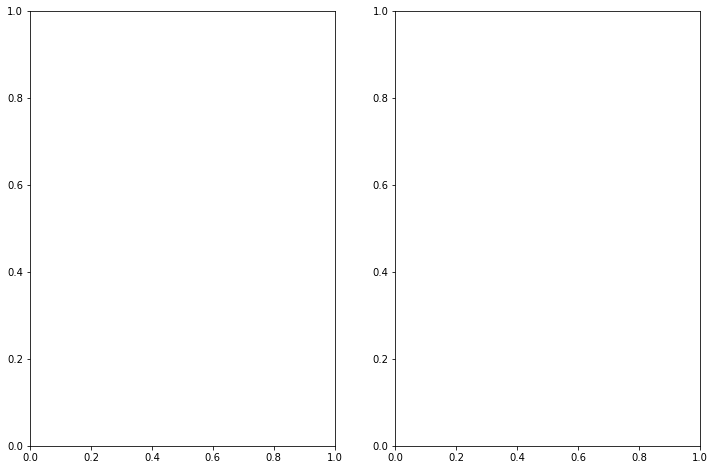

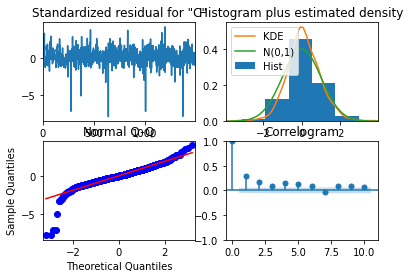

In [52]:
#Snip plots
plt.subplots(1,2,figsize=(12,8))
sarima_result.plot_diagnostics()

In [53]:
#save sarima rmse (residuals)
sarima_residuals = sarima_result.resid
sarima_residuals = sarima_residuals.values
sarima_rmse = np.sqrt(np.mean(np.square(arima_residuals)))
sarima_rmse

624.0282374641181

In [54]:
sarima_forecast = sarima_result.get_forecast(steps=28).predicted_mean

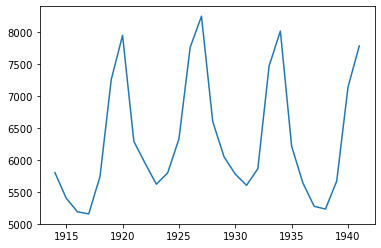

In [55]:
plt.plot(forecast_days, sarima_forecast)

### Random Forest Regressor

In [56]:
def make_Xy_df(data, n_in=1, n_out=1, dropnan=True):
    df = pd.DataFrame(data)
    cols = []
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan==True:
        agg.dropna(inplace=True)
    elif dropnan==False: 
        agg.fillna(method='bfill',inplace=True)
    return agg.values

In [57]:
#Time Series with 7 Shifts as features
CA3_withShifts = make_Xy_df(ca3_sales, n_in=7)

In [58]:
CA3_withShifts[:5]

array([[4739., 4827., 3785., 4232., 3817., 4369., 4703., 5456.],
       [4827., 3785., 4232., 3817., 4369., 4703., 5456., 5581.],
       [3785., 4232., 3817., 4369., 4703., 5456., 5581., 4912.],
       [4232., 3817., 4369., 4703., 5456., 5581., 4912., 4447.],
       [3817., 4369., 4703., 5456., 5581., 4912., 4447., 4544.]])

In [59]:
ca3_sales.head(10)

,CA_3
day,
1,4739
2,4827
3,3785
4,4232
5,3817
6,4369
7,4703
8,5456
9,5581


In [60]:
def find_optimal_rfr_param(X_array,y_array,max_feat=4,md_max=100):
    """for max_depth_max (md_max), choose an integer between 50 and 150.
    for max_features (max_feat), choose the mean number of features"""
    X = X_array
    y= y_array
    tscv = TimeSeriesSplit(n_splits=5)
    max_depth =[]
    score = []
    for tr_index, val_index in tscv.split(X):
        X_tr, X_val = X[tr_index],X[val_index]
        y_tr, y_val = y[tr_index], y[val_index]
        for md in np.arange(50, md_max):
            rfr = RandomForestRegressor(max_features=max_feat,max_depth=md)
            rfr.fit(X_tr, y_tr)
            prediction = rfr.predict(X_val)
            max_depth.append(md)
            score.append(np.sqrt(mean_squared_error(y_val,prediction)))

    minscore = min(score)
    index = score.index(minscore)
    print("Best params: (max_depth,max_features) --> (%.0f,%.0f)"%(max_depth[index],max_feat)) #140

In [61]:
find_optimal_rfr_param(CA3_withShifts[:,:-1], CA3_withShifts[:,-1],max_feat=4,md_max=150)

Best params: (max_depth,max_features) --> (129,4)


In [62]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]


# fit an random forest model and make a one step prediction
def model_forecast(train, testX, model):
    """ model=RandomForestRegressor(max_features=4,max_depth=130)"""
    # transform list into array
    train = np.asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    #model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict([testX])
    return yhat[0]


# walk-forward validation for univariate data
def foreward_stepwise_forecast(data, n_test, model):
    predictions = []
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = model_forecast(history, testX,model)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        #print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    return predictions

In [63]:
def find_rfr_rmse(X_array,y_array,max_feat=4,md_max=100):
    """for max_depth_max (md_max), choose an integer between 50 and 150.
    for max_features (max_feat), choose the mean number of features"""
    X = X_array
    y= y_array
    tscv = TimeSeriesSplit(n_splits=5)
    max_depth =[]
    score = []
    for tr_index, val_index in tscv.split(X):
        X_tr, X_val = X[tr_index],X[val_index]
        y_tr, y_val = y[tr_index], y[val_index]
        rfr = RandomForestRegressor(max_features=max_feat,max_depth=md_max)
        rfr.fit(X_tr, y_tr)
        prediction = rfr.predict(X_val)
        score.append(np.sqrt(mean_squared_error(y_val,prediction)))

    #meanscore = np.mean(np.asarray(score))
    meanscore = hmean(np.asarray(score))
    return meanscore

In [64]:
#Find rmse on original data
rfr_rmse = find_rfr_rmse(CA3_withShifts[:,:-1], CA3_withShifts[:,-1],max_feat=4,md_max=114)

In [65]:
rfr_rmse

676.2735772756939

In [66]:
#Forecast
ml_data = make_Xy_df(ca3_sales, n_in=7, n_out=1, dropnan=True)
rfr_forecast = foreward_stepwise_forecast(ml_data, 28,RandomForestRegressor(max_features=4,max_depth=114))

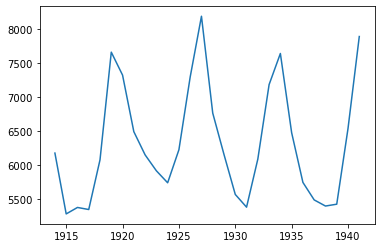

In [67]:
plt.plot(forecast_days, rfr_forecast)

### K-Nearest Neighbors Regressor

In [68]:
def find_optimal_knn_param(X_array,y_array,max_nn=30):
    """for max_neighbors choose an integer between 1 and 60."""
    X = X_array
    y= y_array
    tscv = TimeSeriesSplit(n_splits=5)
    max_neighbors =[]
    score = []
    for tr_index, val_index in tscv.split(X):
        X_tr, X_val = X[tr_index],X[val_index]
        y_tr, y_val = y[tr_index], y[val_index]
        for n in np.arange(1, max_nn+1):
            knn = KNN(n_neighbors=n)
            knn.fit(X_tr, y_tr)
            prediction = knn.predict(X_val)
            max_neighbors.append(n)
            score.append(np.sqrt(mean_squared_error(y_val,prediction)))

    minscore = min(score)
    index = score.index(minscore)
    print("Best params: (n_neighbors --> (%.0f)"%(max_neighbors[index])) #7

In [69]:
find_optimal_knn_param(CA3_withShifts[:,:-1], CA3_withShifts[:,-1],max_nn=30)

Best params: (n_neighbors --> (7)


In [70]:
def find_knn_rmse(X_array,y_array,n=7):
    """for max_neighbors choose an integer between 1 and 60."""
    X = X_array
    y= y_array
    tscv = TimeSeriesSplit(n_splits=5)
    max_neighbors =[]
    score = []
    for tr_index, val_index in tscv.split(X):
        X_tr, X_val = X[tr_index],X[val_index]
        y_tr, y_val = y[tr_index], y[val_index]
        knn = KNN(n_neighbors=n)
        knn.fit(X_tr, y_tr)
        prediction = knn.predict(X_val)
        max_neighbors.append(n)
        score.append(np.sqrt(mean_squared_error(y_val,prediction)))

    #meanscore = np.mean(np.asarray(score))
    meanscore = hmean(np.asarray(score))
    return meanscore

In [71]:
#Find rmse on original data
knn_rmse = find_knn_rmse(CA3_withShifts[:,:-1], CA3_withShifts[:,-1],n=7)

In [72]:
knn_rmse

698.2449956845279

In [73]:
#Forecast
ml_data = make_Xy_df(ca3_sales, n_in=7, n_out=1, dropnan=True)
knn_forecast = foreward_stepwise_forecast(ml_data, 28,KNN(n_neighbors=7))

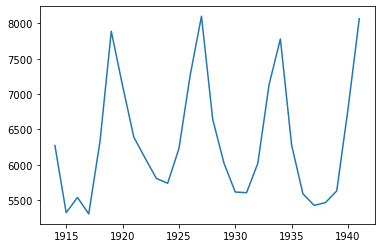

In [74]:
plt.plot(forecast_days, knn_forecast)

### Conclusion

In [75]:
forecast_df = pd.DataFrame(np.round(arima_forecast.values), index=forecast_days, columns=["arima_forecast"])
forecast_df["sarima_forecast"] = np.round(sarima_forecast.values)
forecast_df["rfr_forecast"] = np.round(rfr_forecast)
forecast_df["knn_forecast"] = np.round(knn_forecast)

In [76]:
forecast_df

,arima_forecast,sarima_forecast,rfr_forecast,knn_forecast
1914,6399.0,5798.0,6180.0,6272.0
1915,5622.0,5399.0,5285.0,5323.0
1916,5625.0,5185.0,5380.0,5538.0
1917,5264.0,5152.0,5350.0,5305.0
1918,5695.0,5737.0,6081.0,6332.0
1919,7221.0,7255.0,7664.0,7889.0
1920,7631.0,7944.0,7326.0,7119.0
1921,6370.0,6287.0,6495.0,6391.0
1922,5645.0,5944.0,6154.0,6094.0
1923,5603.0,5617.0,5920.0,5808.0


<AxesSubplot:>

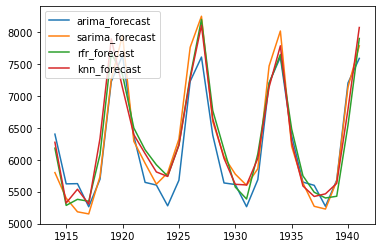

In [77]:
forecast_df.plot()

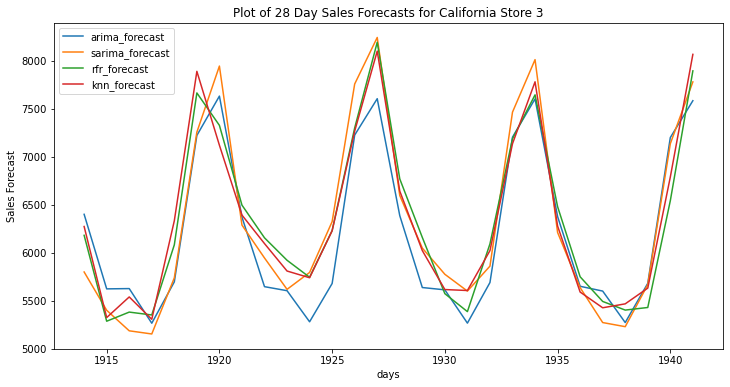

In [78]:
fig, ax = plt.subplots(figsize=(12, 6))
forecast_df.plot(ax=ax)
plt.xlabel("days")
plt.ylabel("Sales Forecast")
plt.title("Plot of 28 Day Sales Forecasts for California Store 3")
plt.savefig("FinalFigures/AllForecastsPlot1.png")
plt.show()

In [79]:
ca3_sales_withForecast = ca3_sales.append(forecast_df)

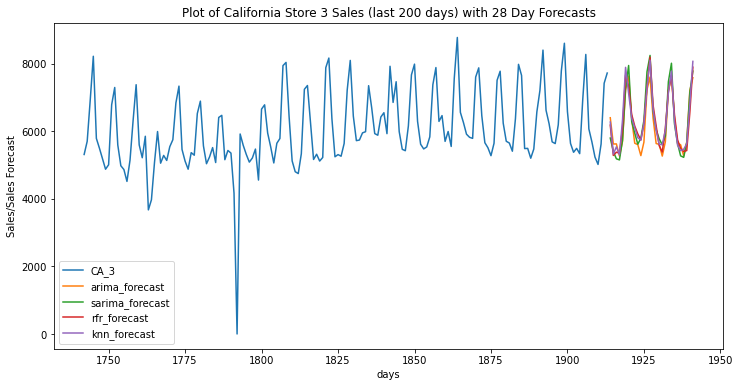

In [80]:
fig, ax = plt.subplots(figsize=(12, 6))
ca3_sales_withForecast.iloc[-200:].plot(ax=ax)
plt.xlabel("days")
plt.ylabel("Sales/Sales Forecast")
plt.title("Plot of California Store 3 Sales (last 200 days) with 28 Day Forecasts")
plt.savefig("FinalFigures/SalesWithForecastsPlot1.png")
plt.show()

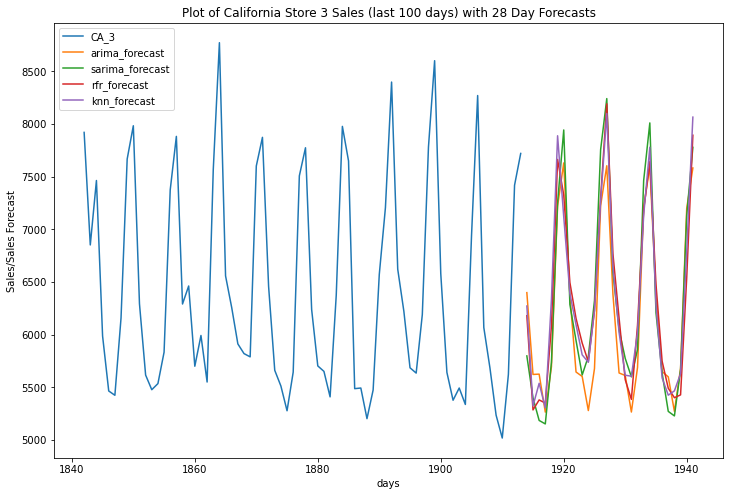

In [81]:
fig, ax = plt.subplots(figsize=(12, 8))
ca3_sales_withForecast.iloc[-100:].plot(ax=ax)
plt.xlabel("days")
plt.ylabel("Sales/Sales Forecast")
plt.title("Plot of California Store 3 Sales (last 100 days) with 28 Day Forecasts")
plt.savefig("FinalFigures/SalesWithForecastsPlot2.png")
plt.show()

In [82]:
rmse_dict = {"arima_rmse":arima_rmse, "sarima_rmse":sarima_rmse, "rfr_rmse":rfr_rmse, "knn_rmse": knn_rmse}

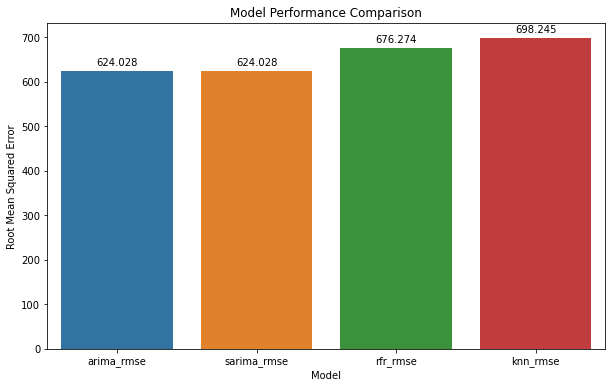

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
ax=sns.barplot(x=list(rmse_dict.keys()), y=list(rmse_dict.values()))
plt.xticks(range(len(rmse_dict)), list(rmse_dict.keys()))
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width()/2., p.get_height()), ha = "center", va = "center", xytext= (0,9), textcoords ="offset points")
plt.xlabel("Model")
plt.ylabel("Root Mean Squared Error")
plt.title("Model Performance Comparison")
plt.savefig("FinalFigures/RMSEPlot.png")
plt.show()

Comparatively, all the models produced similar 28 day sales forecasts. If we base the choice of an ideal model on interpretability and model parsimony, the ARIMA(6,0,7) model stands out. 